Requires matplotlib and numpy from pip. The maze animation will be saved as a .gif file into the same directory as this notebook file. output will be diplayed with the graph but it WILL NOT BE ANIMATED, PLEASE view the gif file generated as: 

bfs_search.gif

KeyboardInterrupt: 

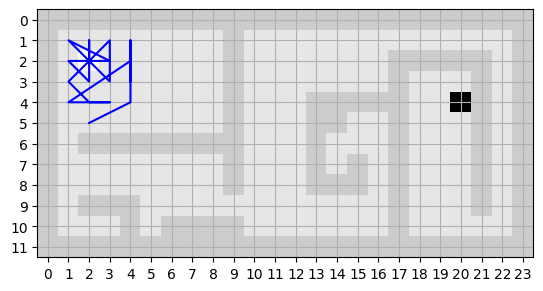

In [11]:
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation
from collections import deque
# Define the maze as a 2D numpy array

maze = np.array([
    [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
    [1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1],
    [1,0,-1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,1,1,0,1],
    [1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1],
    [1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,1,1,1,0,0,9,1,0,1],
    [1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,1,0,1],
    [1,0,1,1,1,1,1,1,1,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1],
    [1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0,1],
    [1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,1,0,1,0,0,0,1,0,1],
    [1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1],
    [1,0,0,0,1,0,1,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1],
    [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
])

# Define the start and end points
start = (2, 2)
end = (4, 20)

def bfs(maze, start, end):
        """
        Perform a breadth-first search on the maze from the start point to the end point.

        Args:
        maze (numpy array): The 2D maze
        start (tuple): The starting point (x, y)
        end (tuple): The ending point (x, y)

        Returns:
        None
        """
        queue = deque([start])  # Initialize the queue with the start point
        path = []  # Initialize the path list
        visited = set()  # Initialize the set of visited points

        while queue:  # Loop until the queue is empty
            x, y = queue.popleft()  # Pop the first point from the queue, which will assign the current position to x, y and remove that value from the queue

            if (x, y) == end:  # If the current point is the end point
                path.append((x, y))  # Add the point to the path
                break  # Stop the search when the goal is reached

            if (x, y) in visited:
                continue

            visited.add((x, y))  # Add the current point to the visited set
            path.append((x, y))  # Add the current point to the path

            for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1), (-1, -1), (1, 1), (-1, 1), (1, -1)]:  # Check all eight directions
                nx, ny = x + dx, y + dy  # Calculate the next point

                if (maze[nx, ny] == 0 or maze[nx, ny] == 9) and (nx, ny) not in visited:  # If the next point is not a wall or visited
                    queue.append((nx, ny))  # Add the next point to the queue

        # Plotting code
        fig, ax = plt.subplots()  # Create a figure and axis for plotting
        plt.xticks(range(0, len(maze[0])))
        plt.yticks(range(0, len(maze)))
        plt.grid()
        ax.imshow(maze, cmap='binary')  # Plot the maze
        line, = ax.plot([], [], 'b-')  # Initialize the line for plotting the path
        writer = animation.PillowWriter(fps=10)  # Initialize the animation writer

        with writer.saving(fig, 'bfs_search.gif', 100):  # Save the image stream as an animation to a gif file
            for point in path:
                line.set_data([p[1] for p in path[:path.index(point)+1]], [p[0] for p in path[:path.index(point)+1]])  # Update the line with the current path
                ax.imshow(maze, cmap='binary')  # Replot the maze
                writer.grab_frame()  # Grab the current frame

        plt.show()  # Show the final plot
    
# Run the DFS algorithm
bfs(maze, start, end)